# Decretos gubernamentales decretados en la emergencia economica del COVID-19

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://www.datos.gov.co/resource/2y49-6wik.csv")
df

,expediente_tipo,expediente_numero,fecha_radicacion,decreto_legislativo,emergencia,sector,tema,articulos_por_decreto,sentencia,decision,articulos_exequibles,articulos_cond_expinex,articulos_inexequibles,comunicado_prensa
0,RE,232,2020-03-18T00:00:00.000,DECRETO LEGISLATIVO 417 DE 2020,Primera declaratoria,Interior,"Declara el Estado de Emergencia Económica, Soc...",4,C-145/20,Exequibilidad,4,0,0,21
1,RE,233,2020-03-24T00:00:00.000,DECRETO LEGISLATIVO 434 DE 2020,Primera declaratoria,"Comercio, Industria y Turismo",Plazos especiales para renovación matrícula me...,6,C-152/20,Exequibilidad,6,0,0,22
2,RE,234,2020-03-24T00:00:00.000,DECRETO LEGISLATIVO 438 DE 2020,Primera declaratoria,Hacienda y Crédito Público,Exenciones transitorias del IVA para ciertos p...,5,C-159/20,Exequibilidad,5,0,0,23
3,RE,235,2020-03-24T00:00:00.000,DECRETO LEGISLATIVO 439 DE 2020,Primera declaratoria,Transporte,Suspensión desembarque con fines de ingreso o ...,7,C-157/20,Exequibilidad,7,0,0,23
4,RE,236,2020-03-24T00:00:00.000,DECRETO LEGISLATIVO 440 DE 2020,Primera declaratoria,Contratación Estatal,Medidas de urgencia en contratación estatal,11,C-162/20,Exequibilidad,11,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RE,342,2020-06-05T00:00:00.000,DECRETO LEGISLATIVO 815 DE 2020,Segunda declaratoria,Hacienda y Crédito Público,Por el cual se modifica el Decreto Legislativo...,7,C-460/20,Exequibilidad parcial/condicionada,6,1,0,44
111,RE,343,2020-06-05T00:00:00.000,DECRETO LEGISLATIVO 816 DE 2020,Segunda declaratoria,Hacienda y Crédito Público,Por el cual se establecen normas relacionadas ...,3,C-406/20,Exequibilidad,3,0,0,39
112,RE,344,2020-06-05T00:00:00.000,DECRETO LEGISLATIVO 817 DE 2020,Segunda declaratoria,Hacienda y Crédito Público,Por el cual se establecen las condiciones espe...,4,C-331/20,Exequibilidad,4,0,0,34
113,RE,345,2020-06-05T00:00:00.000,DECRETO LEGISLATIVO 818 DE 2020,Segunda declaratoria,Cultura,Por el cual se adoptan medidas especiales para...,7,C-402/20,Exequibilidad,7,0,0,39


In [4]:
df.columns

Index(['expediente_tipo', 'expediente_numero', 'fecha_radicacion',
       'decreto_legislativo', 'emergencia', 'sector', 'tema',
       'articulos_por_decreto', 'sentencia', 'decision',
       'articulos_exequibles', 'articulos_cond_expinex',
       'articulos_inexequibles', 'comunicado_prensa'],
      dtype='object')

In [5]:
df.dtypes

expediente_tipo           object
expediente_numero          int64
fecha_radicacion          object
decreto_legislativo       object
emergencia                object
sector                    object
tema                      object
articulos_por_decreto      int64
sentencia                 object
decision                  object
articulos_exequibles       int64
articulos_cond_expinex     int64
articulos_inexequibles     int64
comunicado_prensa          int64
dtype: object

In [6]:
#df["decreto numero"] = df.decreto_legislativo.slice(start=20,stop=23)
df['decreto_numero'] = df['decreto_legislativo'].str[20:23]

In [7]:
df['decreto_numero']

0      417
1      434
2      438
3      439
4      440
      ... 
110    815
111    816
112    817
113    818
114    819
Name: decreto_numero, Length: 115, dtype: object

In [8]:
df['decreto_numero']=df['decreto_numero'].astype(int)

In [9]:
df.dtypes

expediente_tipo           object
expediente_numero          int64
fecha_radicacion          object
decreto_legislativo       object
emergencia                object
sector                    object
tema                      object
articulos_por_decreto      int64
sentencia                 object
decision                  object
articulos_exequibles       int64
articulos_cond_expinex     int64
articulos_inexequibles     int64
comunicado_prensa          int64
decreto_numero             int64
dtype: object

In [10]:
#lista_decretos = df['decreto_numero'].tolist()

In [ ]:
#lista_decretos

In [11]:
df.set_index('decreto_numero', inplace=True)

In [12]:
df.index

Int64Index([417, 434, 438, 439, 440, 441, 444, 458, 460, 461,
            ...
            810, 811, 812, 813, 814, 815, 816, 817, 818, 819],
           dtype='int64', name='decreto_numero', length=115)

In [13]:
lista_sector = df.drop_duplicates(subset="sector")["sector"].tolist()

In [14]:
len(lista_sector)

16

In [16]:
def tabla_frecuencias_unico(dataframe, serie, lista): 
    '''
    Dataframe tabla de frecuencia (no intervalo), con porcentaje y acumulado
    '''
    frecuencia=[] 
    indice=[]
    for i in lista: 
        filtro = (df[serie]==i) 
        serie_filtro = df[serie][filtro]

        indice.append(i)
        frecuencia.append(len(serie_filtro))
    tabla = pd.DataFrame(index = indice)
    tabla["Frecuencias"] = frecuencia
    tabla["%"] = round(tabla["Frecuencias"]/tabla["Frecuencias"].sum()*100,2)
    return tabla

In [17]:
tabla = tabla_frecuencias_unico(df, "sector", lista_sector)
tabla.index.name = "sector"
'''
tabla.loc['Total'] = [tabla["Frecuencias"].sum(), tabla["%"].sum()]
tabla
'''
tabla.sort_values(by='%',ascending=False)

,Frecuencias,%
sector,,
Hacienda y Crédito Público,40,34.78
Trabajo y Seguridad Social,11,9.57
Salud y Protección Social,9,7.83
Justicia,8,6.96
Tecnologías De La Información y Comunicaciones,8,6.96
"Comercio, Industria y Turismo",7,6.09
Educación,6,5.22
Transporte,5,4.35
Contratación Estatal,4,3.48


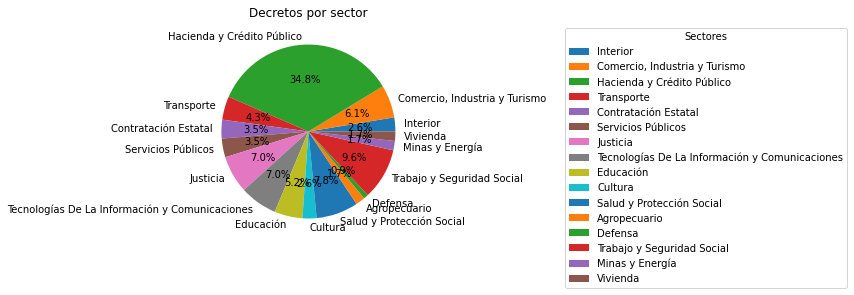

In [18]:
plt.pie(tabla["%"], labels=tabla.index, autopct='%1.1f%%',shadow=False)
plt.title("Decretos por sector")
plt.legend(title="Sectores", bbox_to_anchor=(1, 0, 2, 1))
plt.show()

Ahora si vamos a decretos que esten directamente relacionados con el covid 19:

In [19]:
lista_tema = df.drop_duplicates(subset="tema")["tema"].tolist()
lista_tema

['Declara el Estado de Emergencia Económica, Social y Ecológica en todo el territorio nacional por el término de 30 días',
 'Plazos especiales para renovación matrícula mercantil, el RUNEOL y demás registros que integran el Registro Único Empresarial y Social RUES. Reuniones ordinarias asambleas y demás cuerpos colegiados',
 'Exenciones transitorias del IVA para ciertos productos médicos y clínicos. Ampliación plazo actualización del Régimen Tributario Especial',
 'Suspensión desembarque con fines de ingreso o conexión en territorio colombiano, de pasajeros procedentes del exterior por vía aérea',
 'Medidas de urgencia en contratación estatal',
 'Acceso a agua potable en situaciones de emergencia sanitaria. Reconexión servicio de agua a suscriptores residenciales suspendidos. Suspensión incrementos tarifarios. Uso de recursos del Sistema General de Participaciones',
 'Creación del Fondo de Mitigación de Emergencias, FOME, para atender las necesidades de recursos destinados a la atenció

Vamos a ver de estos decretos, cuales estos estuvieron relacionados a la primera declaratoria o a la segunda: 
- "En este sentido, la declaratoria de la primera emergencia económica estuvo vigente hasta el 17 de abril (se declaró el 17 de marzo mediante el decreto 417 de 2020); y, mediante el decreto 637 del 6 de mayo de 2020 se declaró, por segunda vez, el Estado de Emergencia Económica, Social y Ecológica en todo el territorio colombiano."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


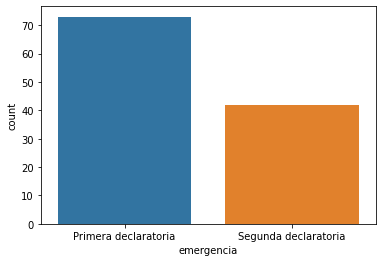

In [28]:
sns.countplot(df['emergencia'])

In [36]:
df.loc[552]

expediente_tipo                                                          RE
expediente_numero                                                       279
fecha_radicacion                                    2020-04-16T00:00:00.000
decreto_legislativo                         DECRETO LEGISLATIVO 552 DE 2020
emergencia                                             Primera declaratoria
sector                                           Hacienda y Crédito Público
tema                      Adición de recursos provenientes del Fondo de ...
articulos_por_decreto                                                     6
sentencia                                                          C-240/20
decision                                                      Exequibilidad
articulos_exequibles                                                      6
articulos_cond_expinex                                                    0
articulos_inexequibles                                                    0
comunicado_p

In [37]:
df.loc[552]['tema']

'Adición de recursos provenientes del Fondo de Riesgos Laborales (FRL) al Fondo de Mitigación de Emergencias (FOME)'

In [21]:
filtro = (df["emergencia"]=="Segunda declaratoria") 
lista_tema_segunda = df.drop_duplicates(subset="tema")[filtro]["tema"].tolist()
lista_tema_segunda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


['Por el cual se declara un estado de emergencia economica, social y ecologica en todo el territorio nacional',
 'Por el cual se crea el Programa de apoyo al empleo formal -PAEF, en el marco del Estado de Emergencia Económica, Social y Ecológica',
 'Por medio del cual se dictan medidas para garantizar la operación de los medios abiertos radiodifundidos y la televisión comunitaria en el marco del Estado de Emergencia Económica, Social y Ecológica en el territorio Nacional',
 'Por el cual se entrega una transferencia monetaria no condicionada, adicional y extraordinaria en favor de los beneficios de los Programas de Familias en Acción , Protección Social al Adulto Mayor - Colombia Mayor y Jóvenes en Acción y se dictan otras disposiciones en el Marco del Estado de Emergencia Económica, Social y Ecológica.',
 'Por el cual se dictan medidas relacionadas con el calendario académico para la prestación del servicio educativo, en el marco del Estado de Emergencia Económica, Social y Ecológica.'

In [38]:
filtro = (df["tema"]=="Por el cual se crea el Programa de apoyo al empleo formal -PAEF, en el marco del Estado de Emergencia Económica, Social y Ecológica") 
table2 = table2[filtro]
table2

decreto_numero
639    True
Name: tema, dtype: bool

In [39]:
df.loc[639]

expediente_tipo                                                          RE
expediente_numero                                                       306
fecha_radicacion                                    2020-05-11T00:00:00.000
decreto_legislativo                         DECRETO LEGISLATIVO 639 DE 2020
emergencia                                             Segunda declaratoria
sector                                           Hacienda y Crédito Público
tema                      Por el cual se crea el Programa de apoyo al em...
articulos_por_decreto                                                    13
sentencia                                                          C-458/20
decision                                 Exequibilidad parcial/condicionada
articulos_exequibles                                                     12
articulos_cond_expinex                                                    1
articulos_inexequibles                                                    0
comunicado_p